Conduct market basket analysis on super market membership cards
- dataset from kaggle: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
- reference: https://towardsdatascience.com/customer-segmentation-with-python-31dca5d5bdad

# Import package & Read data

In [1]:
# import package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# reading dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Preprocessing data

In [3]:
# standardizing variables

col_names = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit_transform(features.values)
scaled_features = pd.DataFrame(scaler, columns= col_names)
scaled_features.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [4]:
# one-hot encoding for categorical col

df_new = scaled_features.join(df['Gender'])
df_new = pd.get_dummies(df_new, drop_first=True)
df_new.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0


# Building Model_before PCA

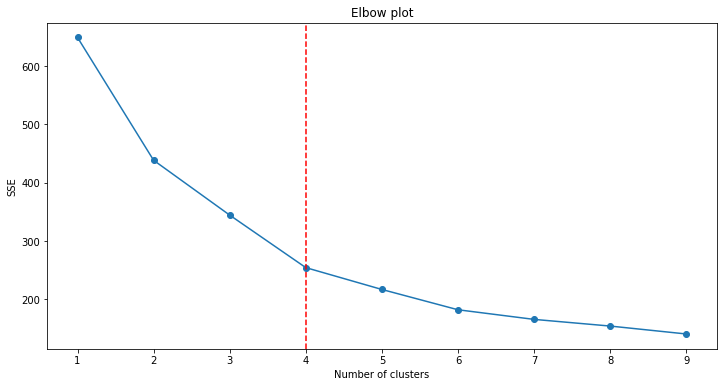

0.35027020434653977


In [6]:
# building clustering model

SSE=[]

for cluster in range(1,10):
    model=KMeans(n_clusters=cluster)
    model.fit(df_new)
    SSE.append(model.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,10),SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow plot')
plt.axvline(x = 4, color = 'red', linestyle = '--')
plt.show()

# Silhouette coefficient
model = KMeans(n_clusters=4)
model.fit(df_new)
print(silhouette_score(df_new, model.labels_))

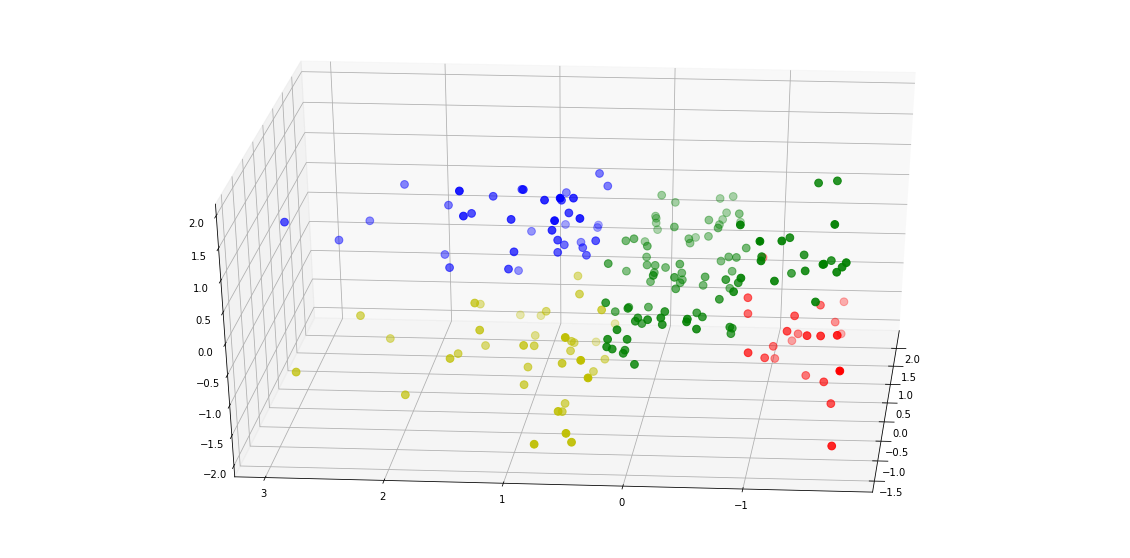

In [7]:
clusters = model.fit_predict(df_new.iloc[:,1:])
df_new['label'] = clusters
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new.Age[df_new.label == 0], df_new["Annual Income (k$)"][df_new.label == 0], df_new["Spending Score (1-100)"][df_new.label == 0], c='b', s=60)
ax.scatter(df_new.Age[df_new.label == 1], df_new["Annual Income (k$)"][df_new.label == 1], df_new["Spending Score (1-100)"][df_new.label == 1], c='r', s=60)
ax.scatter(df_new.Age[df_new.label == 2], df_new["Annual Income (k$)"][df_new.label == 2], df_new["Spending Score (1-100)"][df_new.label == 2], c='g', s=60)
ax.scatter(df_new.Age[df_new.label == 3], df_new["Annual Income (k$)"][df_new.label == 3], df_new["Spending Score (1-100)"][df_new.label == 3], c='y', s=60)

ax.view_init(30, 185)
plt.show()

# Building Model_after PCA

(0, 1)

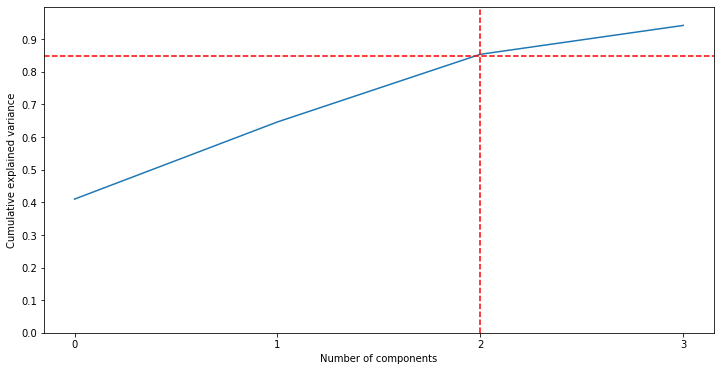

In [14]:
# feature selection

pca = PCA(n_components=4)
PC = pca.fit_transform(df_new)

PCA_components = pd.DataFrame(PC)

plt.figure(figsize=(12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.yticks(np.arange(0,1, step=.1))
plt.xticks(np.arange(0,4 , step=1))
plt.axvline(x=2, linestyle='--',color='r')
plt.axhline(y=0.85, linestyle='--',color='r')

plt.ylim(0,1)


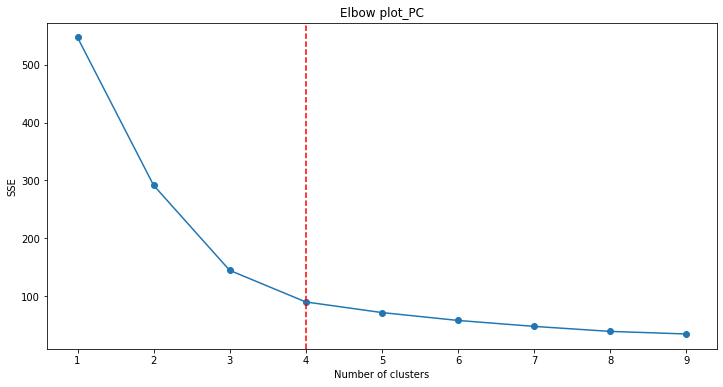

0.5054838094386797


In [16]:
SSE_PC=[]

for k in range(1,10):
    model=KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    SSE_PC.append(model.inertia_)

    
plt.figure(figsize=(12,6))
plt.plot(range(1,10), SSE_PC, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow plot_PC')
plt.axvline(x = 4, color = 'red', linestyle = '--')
plt.show()

# Silhouette coefficient
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_))

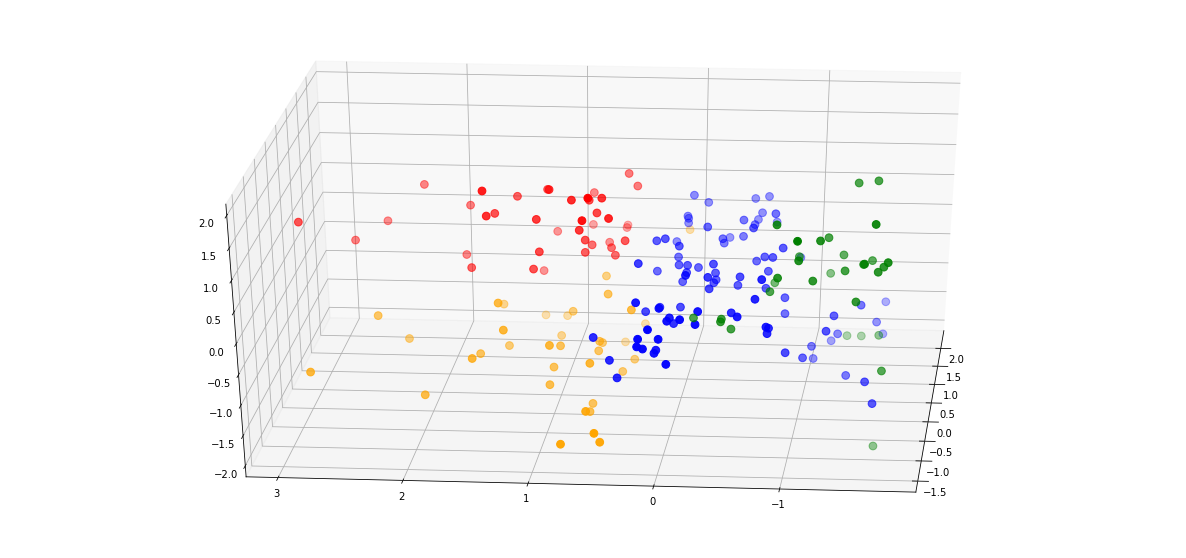

In [17]:
clusters = model.fit_predict(PCA_components.iloc[:,:2])
df_new["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_new.Age[df_new.label == 0], df_new["Annual Income (k$)"][df_new.label == 0], df_new["Spending Score (1-100)"][df_new.label == 0], c='blue', s=60)
ax.scatter(df_new.Age[df_new.label == 1], df_new["Annual Income (k$)"][df_new.label == 1], df_new["Spending Score (1-100)"][df_new.label == 1], c='red', s=60)
ax.scatter(df_new.Age[df_new.label == 2], df_new["Annual Income (k$)"][df_new.label == 2], df_new["Spending Score (1-100)"][df_new.label == 2], c='green', s=60)
ax.scatter(df_new.Age[df_new.label == 3], df_new["Annual Income (k$)"][df_new.label == 3], df_new["Spending Score (1-100)"][df_new.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()


# Interpretating the result

In [18]:
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(['CustomerID'], axis=1)

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [21]:
pivot = df.groupby(['cluster'], as_index=False).mean()
pivot

# cluster 0: most aged with middle income and moderate spending 
# cluster 1: middle aged with high income and spend most
# cluster 2: youngest with lowest income and potential spending score
# cluster 3: aged with highest income and spend the least

,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,44.774194,50.451613,42.978495
1,1,32.692308,86.538462,82.128205
2,2,25.125000,27.937500,68.500000
3,3,42.416667,87.527778,18.000000


In [27]:
pivot_2 = pd.DataFrame(df.groupby(['cluster','Gender'])['Gender'].count())
pivot_2

Gender
cluster Gender        
0       Female      58
        Male        35
1       Female      21
        Male        18
2       Female      18
        Male        14
3       Female      15
        Male        21

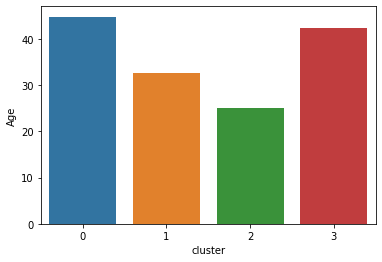

In [24]:
sns.barplot(x='cluster',y='Age',data=pivot)

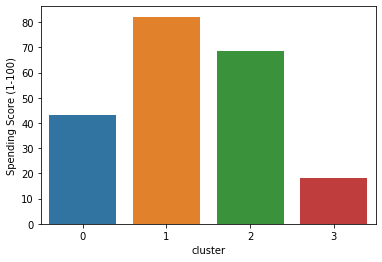

In [25]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=pivot)

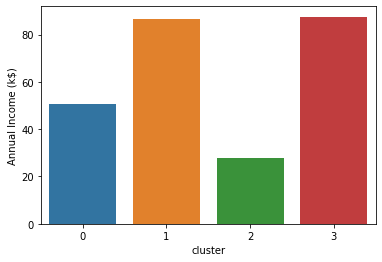

In [26]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=pivot)